In [ ]:
# clean last run result

!('./clean.sh')

In [ ]:
from thunder_ase.fireball import Fireball
import numpy as np
import ase
from ase.build import molecule
from ase import units

# ase MD modules
from ase.md.verlet import VelocityVerlet as NVE
from ase.md.nvtberendsen import NVTBerendsen
from ase.md.npt import NPT

## Basic Setup

In [ ]:
# Read Ag structure

atoms = ase.io.read('Ag.xyz')

In [ ]:
# set Fdata dir
Fdata_path = '~/Fdata/McWEDA-H-C-O-Ag-Au'

In [ ]:
max_step = 10  # run 10 steps for only example

kwargs = {
          'ipi': 1,  # open I-PI socket to speed up
          'efermi_T': 500.0,  # for metal cluster need larger Fermi smear
          }

In [ ]:
fireball = Fireball(command='fireball-ase.3.x', 
                Fdata_path=Fdata_path,
                **kwargs)
atoms.calc = fireball

## Example 1: NVE ensemble

### Run Fireball

In [ ]:
dyn = NVE(atoms, timestep=1.0 * units.fs, trajectory='md-nve.traj', logfile='md-nve.log')
fireball.dynamics(dyn, steps=max_step)

Open md.traj by `ase gui md.traj` in terminal. You will get

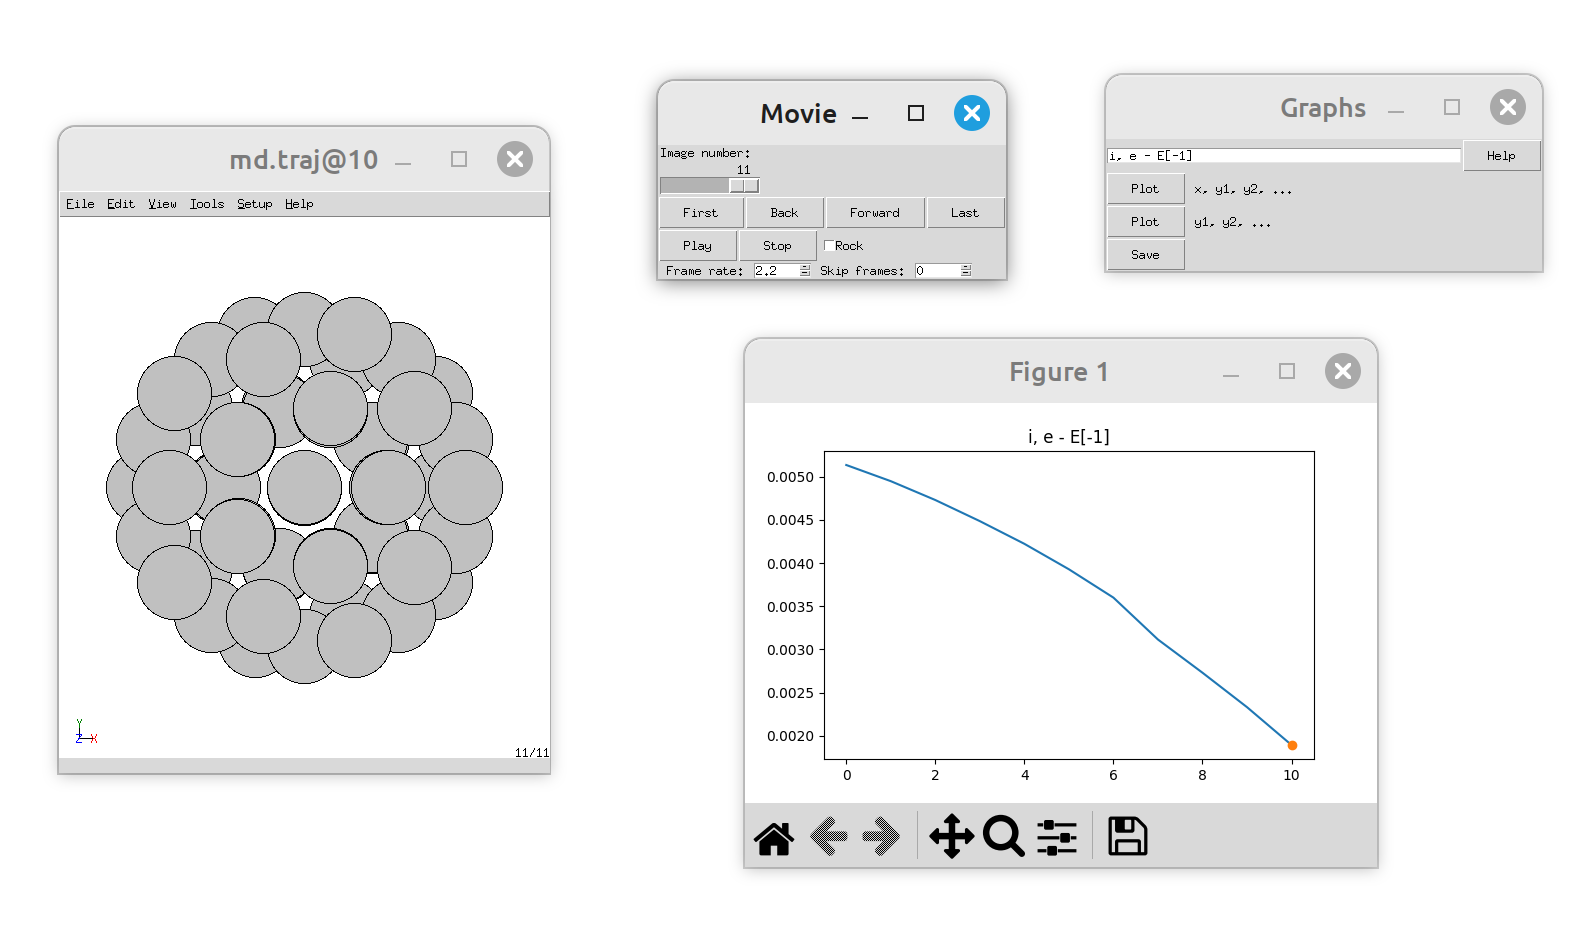

## Example 2: NVT ensemble

In [ ]:
# clean last run result

!('./clean.sh')

In [ ]:
dyn = NVTBerendsen(atoms, timestep=1.0 * units.fs, temperature_K=300,
                   trajectory='md-nvt.traj', logfile='md-nvt.log', 
                   taut=0.5*1000*units.fs)

fireball.dynamics(dyn, steps=max_step)

## Example 2: NPT ensemble

In [ ]:
# clean last run result

!('./clean.sh')

In [ ]:
atoms.set_cell([30,30,30])  # NPT need a box

In [ ]:
dyn = NPT(atoms, timestep=1.0 * units.fs, temperature_K=300,
          trajectory='md-npt.traj', logfile='md-npt.log',
          externalstress=0.0, ttime=0.5*1000*units.fs)

fireball.dynamics(dyn, steps=max_step)